In [0]:
a = [] #increses the resourse provided by colab 
while(1):
    a.append('1')                                                                                 

liar dataset (already preprocessed)
1=true 0=false

In [0]:
from google.colab import files 
uploaded = files.upload()

Saving liar_data.csv to liar_data.csv


In [0]:
import io 
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['liar_data.csv'])) 
print(type(data))
print(data.head())

<class 'pandas.core.frame.DataFrame'>
   label  ...                                   context
0      0  ...                                  a mailer
1      0  ...                           a floor speech.
2      0  ...                                    Denver
3      0  ...                 a an online opinion-piece
4      0  ...  a Democratic debate in Philadelphia, Pa.

[5 rows x 8 columns]


In [0]:
data.columns


Index(['label', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party', 'context'],
      dtype='object')

In [0]:
data.dropna(inplace=True)

In [0]:
data.shape

(8438, 8)

In [0]:
"""
data preprocessing done 
spiltting dataset as 90 10 10 
"""



In [0]:
dataliar_y=data.label
dataliar_x=data.drop(columns=['label'])
print( dataliar_x.shape)
print (dataliar_y.shape)

(8438, 7)
(8438,)


In [0]:
#train test split to form test from megaset
from sklearn.model_selection import train_test_split

X_train_temp, liar_test_x, y_train_temp, liar_test_y = train_test_split(dataliar_x,dataliar_y,test_size=0.1,random_state=12)
print(X_train_temp.shape)
print(liar_test_x.shape)

# mega_test_x : Final testing file with statements
# mega_test_y : Final testing file with ratings

liar_train_x, liar_dev_x, liar_train_y, liar_dev_y = train_test_split(X_train_temp,y_train_temp,test_size=844,random_state=12)

print(liar_train_x.shape)
print(liar_dev_x.shape)

# mega_train_x : Training file with statements
# mega_train_y : Training file with ratings
# mega_dev_x   : Development testing file with statements
# mega_dev_y   : Development testing file with ratings
print(type(liar_train_x))
print(liar_train_y.shape)
print("Final size of train/dev/test : ",liar_train_x.shape,"/",liar_dev_x.shape,"/",liar_test_x.shape)

(7594, 7)
(844, 7)
(6750, 7)
(844, 7)
<class 'pandas.core.frame.DataFrame'>
(6750,)
Final size of train/dev/test :  (6750, 7) / (844, 7) / (844, 7)


In [0]:
"""
function to tokenize and pad
"""
import tensorflow
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
def tokpad(train_x,dev_x):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_x)


    train_text = tokenizer.texts_to_sequences(train_x)
    dev_text = tokenizer.texts_to_sequences(dev_x)

    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
    print('vocab size ',vocab_size)

    maxlen_text =0
    for i in train_x:
        if(len(i)>maxlen_text):
            maxlen_text=len(i)
    print('maxlen ',maxlen_text)

    train_padtext = pad_sequences(train_text, padding='post', maxlen=maxlen_text)
    dev_padtext = pad_sequences(dev_text, padding='post', maxlen=maxlen_text)

    print('train')
    print(train_padtext.shape)
    print('dev')
    print(dev_padtext.shape)
    print(train_padtext[1, :])

    return train_padtext,dev_padtext

In [0]:
"""
Index(['label', 'statement', 'subject', 'speaker', 'speaker_job_title',
       'state_info', 'party', 'context'],
      dtype='object')
  """

In [0]:
#passing subject attribute to tokpad
train_padtext_sub,dev_padtext_sub=tokpad(liar_train_x.subject,liar_dev_x.subject)


vocab size  178
maxlen  203
train
(6750, 203)
dev
(844, 203)
[109 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]


In [0]:
#passing state attribute to tokpad
train_padtext_state,dev_padtext_state=tokpad(liar_train_x.statement,liar_dev_x.statement)

vocab size  9804
maxlen  2099
train
(6750, 2099)
dev
(844, 2099)
[  11 1307    1 ...    0    0    0]


In [0]:
#passing speaker attribute to tokpad
train_padtext_spk,dev_padtext_spk=tokpad(liar_train_x.speaker,liar_dev_x.speaker)

vocab size  2063
maxlen  50
train
(6750, 50)
dev
(844, 50)
[78 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [0]:
#passing speaker_job_title attribute to tokpad
train_padtext_sjt,dev_padtext_sjt=tokpad(liar_train_x.speaker_job_title,liar_dev_x.speaker_job_title)

vocab size  1046
maxlen  100
train
(6750, 100)
dev
(844, 100)
[24 47 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [0]:
#passing state_info attribute to tokpad
train_padtext_stinfo,dev_padtext_stinfo=tokpad(liar_train_x.state_info,liar_dev_x.state_info)

vocab size  75
maxlen  49
train
(6750, 49)
dev
(844, 49)
[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


In [0]:
#passing party attribute to tokpad
train_padtext_pty,dev_padtext_pty=tokpad(liar_train_x.party,liar_dev_x.party)

vocab size  29
maxlen  28
train
(6750, 28)
dev
(844, 28)
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
#passing context attribute to tokpad
train_padtext_cnt,dev_padtext_cnt=tokpad(liar_train_x.context,liar_dev_x.context)

vocab size  1958
maxlen  100
train
(6750, 100)
dev
(844, 100)
[303   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [0]:
#with kernel and bias regularizer 
#more agressive
#model1
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model1 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model1.summary()

116 77
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/25
6750/6750 [==============================] - 7s 992us/step - loss: 1.1083 - acc: 0.7327 - val_loss: 0.5973 - val_acc: 0.7417
Epoch 2/25
6750/6750 [==============================] - 4s 598us/step - loss: 0.5851 - acc: 0.7369 - val_loss: 0.5779 - val_acc: 0.7417
Epoch 3/25
6750/6750 [==============================] - 4s 603us/step - loss: 0.5796 - acc: 0.7369 - val_loss: 0.5815 - val_acc: 0.7417
Epoch 4/25
6750/6750 [==============================] - 4s 601us/step - loss: 0.5648 - acc: 0.7369 - val_loss: 0.6123 - val_acc: 0.7417
Epoch 5/25
6750/6750 [==============================] - 4s 601us/step - loss: 0.5047 - acc: 0.7793 - val_loss: 0.6909 - val_acc: 0.6967
Epoch 6/25
6750/6750 [==============================] - 4s 600us/step - loss: 0.4148 - acc: 0.8560 - val_loss: 0.8064 - val_acc: 0.6706
Epoch 7/25
6750/6750 [==============================] - 4s 599us/step - loss: 0.3247 - acc: 0.9129 - val_loss: 0.9030 - val_acc: 0.6137
E

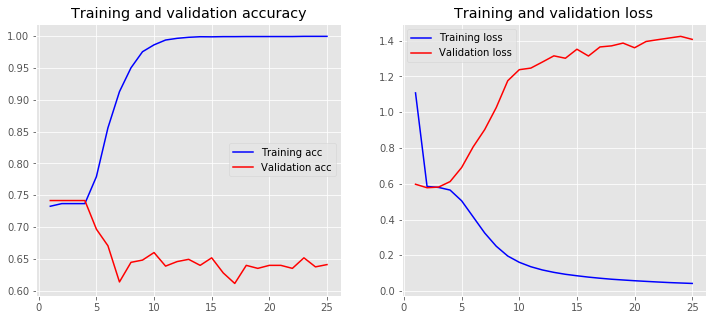

In [0]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model1.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=25, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#with kernel and bias regularizer 
#less agressive
#model2
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(all_d)
d2 = Dense(h2, activation='relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model2 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model2.summary()

116 77
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/25
6750/6750 [==============================] - 7s 1ms/step - loss: 0.6614 - acc: 0.7338 - val_loss: 0.5918 - val_acc: 0.7417
Epoch 2/25
6750/6750 [==============================] - 4s 612us/step - loss: 0.5773 - acc: 0.7369 - val_loss: 0.5846 - val_acc: 0.7417
Epoch 3/25
6750/6750 [==============================] - 4s 626us/step - loss: 0.5272 - acc: 0.7447 - val_loss: 0.6145 - val_acc: 0.7156
Epoch 4/25
6750/6750 [==============================] - 4s 625us/step - loss: 0.4316 - acc: 0.8204 - val_loss: 0.6941 - val_acc: 0.6398
Epoch 5/25
6750/6750 [==============================] - 4s 612us/step - loss: 0.3462 - acc: 0.8819 - val_loss: 0.8030 - val_acc: 0.6505
Epoch 6/25
6750/6750 [==============================] - 4s 611us/step - loss: 0.2761 - acc: 0.9193 - val_loss: 0.9495 - val_acc: 0.6126
Epoch 7/25
6750/6750 [==============================] - 4s 608us/step - loss: 0.2010 - acc: 0.9471 - val_loss: 1.2142 - val_acc: 0.6209
Epo

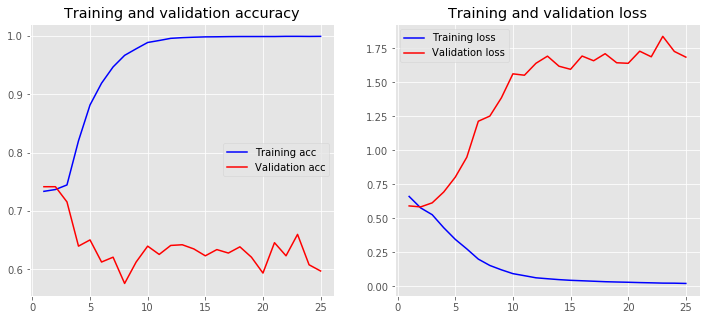

In [0]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model2.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=25, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#activity regularizer
#less agressive
#model3
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.001))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.001))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model3 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model3.summary()

116 77
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/25
6750/6750 [==============================] - 7s 1ms/step - loss: 0.6049 - acc: 0.7324 - val_loss: 0.5897 - val_acc: 0.7417
Epoch 2/25
6750/6750 [==============================] - 4s 591us/step - loss: 0.5562 - acc: 0.7375 - val_loss: 0.6007 - val_acc: 0.7405
Epoch 3/25
6750/6750 [==============================] - 4s 592us/step - loss: 0.4326 - acc: 0.8200 - val_loss: 0.7065 - val_acc: 0.7050
Epoch 4/25
6750/6750 [==============================] - 4s 590us/step - loss: 0.2733 - acc: 0.9166 - val_loss: 0.8664 - val_acc: 0.6090
Epoch 5/25
6750/6750 [==============================] - 4s 591us/step - loss: 0.1584 - acc: 0.9680 - val_loss: 1.0215 - val_acc: 0.6232
Epoch 6/25
6750/6750 [==============================] - 4s 587us/step - loss: 0.0996 - acc: 0.9873 - val_loss: 1.1614 - val_acc: 0.6102
Epoch 7/25
6750/6750 [==============================] - 4s 588us/step - loss: 0.0661 - acc: 0.9966 - val_loss: 1.2731 - val_acc: 0.6031
Epo

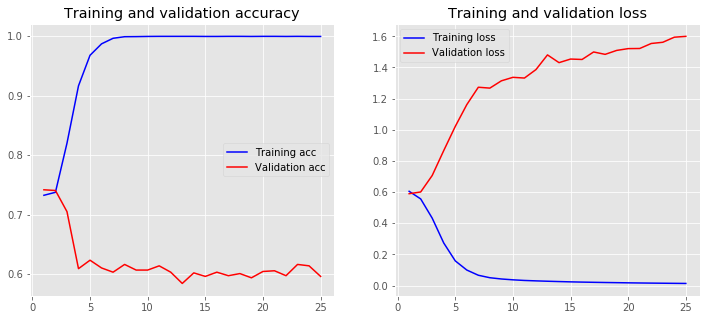

In [0]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model3.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=25, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model4
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model4 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model4.summary()

116 77
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/25
6750/6750 [==============================] - 7s 1ms/step - loss: 1.2293 - acc: 0.7299 - val_loss: 0.6660 - val_acc: 0.7417
Epoch 2/25
6750/6750 [==============================] - 4s 602us/step - loss: 0.6356 - acc: 0.7369 - val_loss: 0.6162 - val_acc: 0.7417
Epoch 3/25
6750/6750 [==============================] - 4s 597us/step - loss: 0.6093 - acc: 0.7369 - val_loss: 0.5989 - val_acc: 0.7417
Epoch 4/25
6750/6750 [==============================] - 4s 592us/step - loss: 0.5964 - acc: 0.7369 - val_loss: 0.5882 - val_acc: 0.7417
Epoch 5/25
6750/6750 [==============================] - 4s 590us/step - loss: 0.5887 - acc: 0.7369 - val_loss: 0.5823 - val_acc: 0.7417
Epoch 6/25
6750/6750 [==============================] - 4s 590us/step - loss: 0.5840 - acc: 0.7369 - val_loss: 0.5780 - val_acc: 0.7417
Epoch 7/25
6750/6750 [==============================] - 4s 588us/step - loss: 0.5816 - acc: 0.7369 - val_loss: 0.5779 - val_acc: 0.7417
Epo

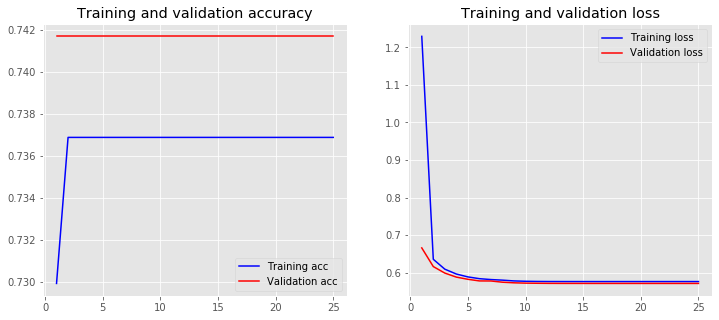

In [0]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model4.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=25, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model5
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model5 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model5.summary()

116 77
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/50
6750/6750 [==============================] - 8s 1ms/step - loss: 1.2474 - acc: 0.7351 - val_loss: 0.6681 - val_acc: 0.7417
Epoch 2/50
6750/6750 [==============================] - 4s 600us/step - loss: 0.6356 - acc: 0.7369 - val_loss: 0.6159 - val_acc: 0.7417
Epoch 3/50
6750/6750 [==============================] - 4s 595us/step - loss: 0.6094 - acc: 0.7369 - val_loss: 0.5984 - val_acc: 0.7417
Epoch 4/50
6750/6750 [==============================] - 4s 595us/step - loss: 0.5964 - acc: 0.7369 - val_loss: 0.5886 - val_acc: 0.7417
Epoch 5/50
6750/6750 [==============================] - 4s 597us/step - loss: 0.5888 - acc: 0.7369 - val_loss: 0.5824 - val_acc: 0.7417
Epoch 6/50
6750/6750 [==============================] - 4s 606us/step - loss: 0.5840 - acc: 0.7369 - val_loss: 0.5781 - val_acc: 0.7417
Epoch 7/50
6750/6750 [==============================] - 4s 599us/step - loss: 0.5812 - acc: 0.7369 - val_loss: 0.5773 - val_acc: 0.7417
Epo

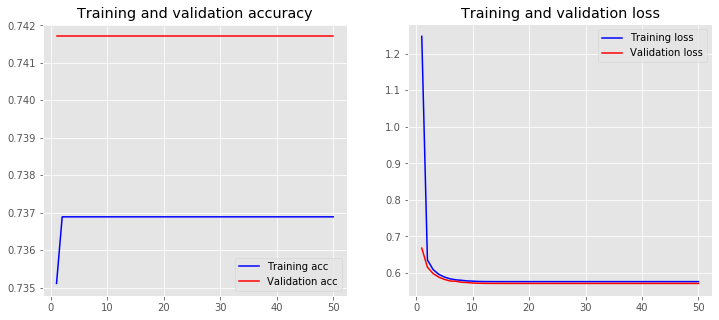

In [0]:
model5.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model5.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=50, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model6
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.01),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.01),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model6 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model6.summary()

116 77
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/50
6750/6750 [==============================] - 8s 1ms/step - loss: 1.1509 - acc: 0.7317 - val_loss: 0.6204 - val_acc: 0.7417
Epoch 2/50
6750/6750 [==============================] - 4s 589us/step - loss: 0.6048 - acc: 0.7369 - val_loss: 0.5921 - val_acc: 0.7417
Epoch 3/50
6750/6750 [==============================] - 4s 591us/step - loss: 0.5927 - acc: 0.7369 - val_loss: 0.5872 - val_acc: 0.7417
Epoch 4/50
6750/6750 [==============================] - 4s 585us/step - loss: 0.5877 - acc: 0.7369 - val_loss: 0.5834 - val_acc: 0.7417
Epoch 5/50
6750/6750 [==============================] - 4s 597us/step - loss: 0.5848 - acc: 0.7369 - val_loss: 0.5797 - val_acc: 0.7417
Epoch 6/50
6750/6750 [==============================] - 4s 597us/step - loss: 0.5832 - acc: 0.7369 - val_loss: 0.5783 - val_acc: 0.7417
Epoch 7/50
6750/6750 [==============================] - 4s 596us/step - loss: 0.5820 - acc: 0.7369 - val_loss: 0.5764 - val_acc: 0.7417
Epo

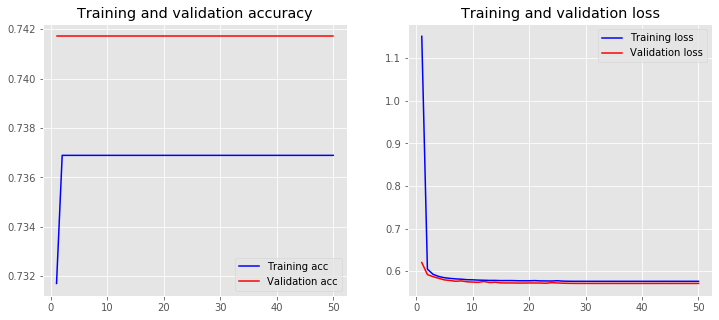

In [0]:
model6.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model6.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=50, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model7
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model7 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model7.summary()

116 77
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/100
6750/6750 [==============================] - 8s 1ms/step - loss: 1.2829 - acc: 0.7369 - val_loss: 0.6805 - val_acc: 0.7417
Epoch 2/100
6750/6750 [==============================] - 4s 634us/step - loss: 0.6403 - acc: 0.7369 - val_loss: 0.6174 - val_acc: 0.7417
Epoch 3/100
6750/6750 [==============================] - 4s 638us/step - loss: 0.6098 - acc: 0.7369 - val_loss: 0.5989 - val_acc: 0.7417
Epoch 4/100
6750/6750 [==============================] - 4s 616us/step - loss: 0.5965 - acc: 0.7369 - val_loss: 0.5886 - val_acc: 0.7417
Epoch 5/100
6750/6750 [==============================] - 4s 604us/step - loss: 0.5891 - acc: 0.7369 - val_loss: 0.5820 - val_acc: 0.7417
Epoch 6/100
6750/6750 [==============================] - 4s 601us/step - loss: 0.5841 - acc: 0.7369 - val_loss: 0.5783 - val_acc: 0.7417
Epoch 7/100
6750/6750 [==============================] - 4s 609us/step - loss: 0.5814 - acc: 0.7369 - val_loss: 0.5757 - val_acc: 0.7

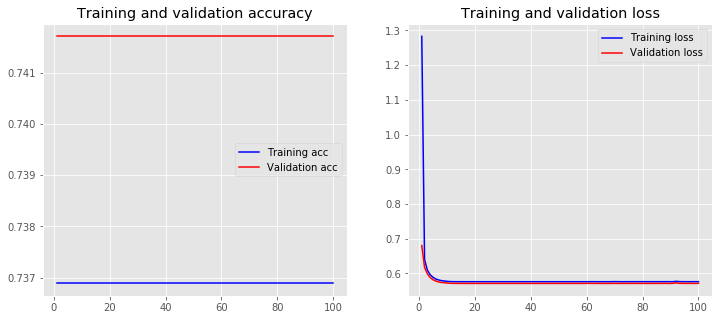

In [0]:
model7.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model7.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=100, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model8
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.01),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.01),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model8 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model8.summary()

116 77
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/100
6750/6750 [==============================] - 8s 1ms/step - loss: 1.1416 - acc: 0.7356 - val_loss: 0.6194 - val_acc: 0.7417
Epoch 2/100
6750/6750 [==============================] - 4s 599us/step - loss: 0.6045 - acc: 0.7369 - val_loss: 0.5924 - val_acc: 0.7417
Epoch 3/100
6750/6750 [==============================] - 4s 603us/step - loss: 0.5928 - acc: 0.7369 - val_loss: 0.5851 - val_acc: 0.7417
Epoch 4/100
6750/6750 [==============================] - 4s 608us/step - loss: 0.5881 - acc: 0.7369 - val_loss: 0.5821 - val_acc: 0.7417
Epoch 5/100
6750/6750 [==============================] - 4s 607us/step - loss: 0.5852 - acc: 0.7369 - val_loss: 0.5790 - val_acc: 0.7417
Epoch 6/100
6750/6750 [==============================] - 4s 607us/step - loss: 0.5829 - acc: 0.7369 - val_loss: 0.5776 - val_acc: 0.7417
Epoch 7/100
6750/6750 [==============================] - 4s 624us/step - loss: 0.5821 - acc: 0.7369 - val_loss: 0.5762 - val_acc: 0.7

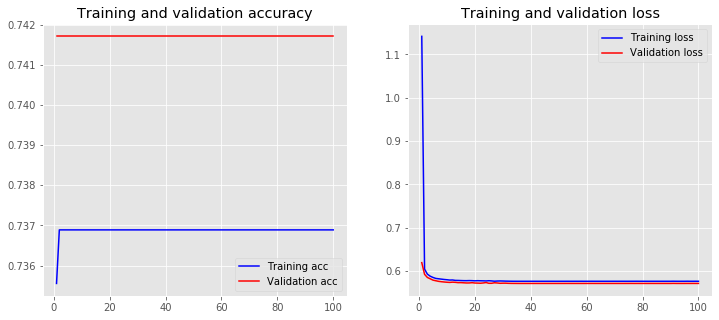

In [0]:
model8.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model8.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=100, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
#all regularizer
#super agressive
#model9
from keras.layers import Embedding
from keras.layers import concatenate
from keras.layers import GlobalMaxPool1D
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2

embedding_dim = 25
h1=int(2/3*175)
h2=int(2/3*h1)
print(h1,h2)

sjtitle_in = Input(shape=(100,), name='sjtitle_in')
speaker_in = Input(shape=(50,), name='speaker_in')
text_in = Input(shape=(2099,), name='text_in')
subject_in = Input(shape=(203,), name='subject_in')
state_in = Input(shape=(49,), name='state_in')
party_in = Input(shape=(28,), name='party_in')
context_in = Input(shape=(100,), name='context_in')

#input dim = vocab size
#input length = maxlen
sjtitle_embed = Embedding(output_dim=embedding_dim, input_dim=1046, input_length=100)(sjtitle_in)
speaker_embed = Embedding(output_dim=embedding_dim, input_dim=2063, input_length=50)(speaker_in)
text_embed = Embedding(output_dim=embedding_dim, input_dim=9804, input_length=2099)(text_in)
subject_embed = Embedding(output_dim=embedding_dim, input_dim=178, input_length=203)(subject_in)
state_embed = Embedding(output_dim=embedding_dim, input_dim=75, input_length=49)(state_in)
party_embed = Embedding(output_dim=embedding_dim, input_dim=29, input_length=28)(party_in)
context_embed = Embedding(output_dim=embedding_dim, input_dim=1958, input_length=100)(context_in)



sjtitle_pool = GlobalMaxPool1D()(sjtitle_embed)
speaker_pool = GlobalMaxPool1D()(speaker_embed)
text_pool = GlobalMaxPool1D()(text_embed)
subject_pool = GlobalMaxPool1D()(subject_embed)
state_pool = GlobalMaxPool1D()(state_embed)
party_pool = GlobalMaxPool1D()(party_embed)
context_pool = GlobalMaxPool1D()(context_embed)


all_d = concatenate([sjtitle_pool, speaker_pool,text_pool,subject_pool,state_pool,party_pool,context_pool])

d1 = Dense(h1, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(all_d)
d2 = Dense(h2, activation='relu',activity_regularizer=l2(0.1),kernel_regularizer=l2(0.1), bias_regularizer=l2(0.1))(d1)

op = Dense(1, activation='sigmoid', name='op')(d2)




model9 = Model(inputs=[sjtitle_in,speaker_in,text_in,subject_in,state_in,party_in,context_in], outputs=[op])

model9.summary()

116 77
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sjtitle_in (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
speaker_in (InputLayer)         (None, 50)           0                                            
__________________________________________________________________________________________________
text_in (InputLayer)            (None, 2099)         0                                            
__________________________________________________________________________________________________
subject_in (InputLayer)         (None, 203)          0                                            
____________________________________________________________________________________

Train on 6750 samples, validate on 844 samples
Epoch 1/25
6750/6750 [==============================] - 9s 1ms/step - loss: 5.7326 - acc: 0.7364 - val_loss: 0.7595 - val_acc: 0.7417
Epoch 2/25
6750/6750 [==============================] - 4s 621us/step - loss: 0.6462 - acc: 0.7369 - val_loss: 0.6122 - val_acc: 0.7417
Epoch 3/25
6750/6750 [==============================] - 4s 614us/step - loss: 0.6066 - acc: 0.7369 - val_loss: 0.5993 - val_acc: 0.7417
Epoch 4/25
6750/6750 [==============================] - 4s 613us/step - loss: 0.5954 - acc: 0.7369 - val_loss: 0.5873 - val_acc: 0.7417
Epoch 5/25
6750/6750 [==============================] - 4s 607us/step - loss: 0.5886 - acc: 0.7369 - val_loss: 0.5819 - val_acc: 0.7417
Epoch 6/25
6750/6750 [==============================] - 4s 605us/step - loss: 0.5845 - acc: 0.7369 - val_loss: 0.5782 - val_acc: 0.7417
Epoch 7/25
6750/6750 [==============================] - 4s 606us/step - loss: 0.5820 - acc: 0.7369 - val_loss: 0.5761 - val_acc: 0.7417
Epo

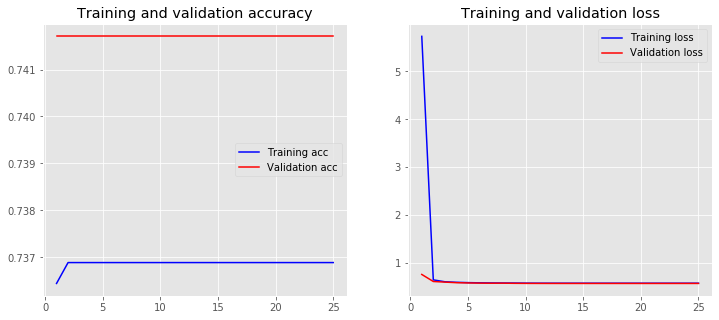

In [0]:
model9.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model9.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=25, batch_size=32,validation_data=({'sjtitle_in':dev_padtext_sjt,'speaker_in':dev_padtext_spk,'text_in':dev_padtext_state,'subject_in':dev_padtext_sub,'state_in':dev_padtext_stinfo,'party_in':dev_padtext_pty,'context_in':dev_padtext_cnt},{'op': liar_dev_y}))
plot_history(h)

In [0]:
import tensorflow
import pandas as pd
import keras 
import numpy as np

In [0]:
#use this tokenizer for data sent
from keras.preprocessing.text import Tokenizer
def tokenize(train_data,dev_data):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(train_data)


  em_data_train = tokenizer.texts_to_sequences(train_data)
  em_data_dev= tokenizer.texts_to_sequences(dev_data)

  #em_data_train=emeded training data
  #em_data_dev=emeded dev data

  vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
  print(vocab_size)


  return em_data_train,em_data_dev,vocab_size

In [0]:
from keras.preprocessing.sequence import pad_sequences

def padding(token_train_data,token_dev_data):
  maxlen=0
  for i in token_train_data:
    if(len(i)>maxlen):
        maxlen=len(i)
  print(maxlen)


  em_data_train_pad= pad_sequences(token_train_data, padding='post', maxlen=maxlen)
  em_data_dev_pad= pad_sequences(token_dev_data, padding='post', maxlen=maxlen)

  return em_data_train_pad,em_data_dev_pad,maxlen

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [0]:
em_data_train_statement,em_data_dev_statement,statement_vocabsize=tokenize(liar_train_x.statement,liar_dev_x.statement)
em_data_train_subject,em_data_dev_subject,subject_vocabsize=tokenize(liar_train_x.subject,liar_dev_x.subject)
em_data_train_speaker,em_data_dev_speaker,speaker_vocabsize=tokenize(liar_train_x.speaker,liar_dev_x.speaker)
em_data_train_speaker_job_title,em_data_dev_speaker_job_title,speaker_job_title_vocabsize=tokenize(liar_train_x.speaker_job_title,liar_dev_x.speaker_job_title)
em_data_train_state_info,em_data_dev_state_info,state_info_vocabsize=tokenize(liar_train_x.state_info,liar_dev_x.state_info)
em_data_train_party,em_data_dev_party,party_vocabsize=tokenize(liar_train_x.party,liar_dev_x.party)
em_data_train_context,em_data_dev_context,context_vocabsize=tokenize(liar_train_x.context,liar_dev_x.context)

9804
178
2063
1046
75
29
1958


In [0]:
em_data_train_padstatement,em_data_dev_padstatement,statement_maxlen=padding(em_data_train_statement,em_data_dev_statement)
em_data_train_padsubject,em_data_dev_padsubject,subject_maxlen=padding(em_data_train_subject,em_data_dev_subject)
em_data_train_padspeaker,em_data_dev_padspeaker,speaker_maxlen=padding(em_data_train_speaker,em_data_dev_speaker)
em_data_train_padspeaker_job_title,em_data_dev_padspeaker_job_title,speaker_job_title_maxlen=padding(em_data_train_speaker_job_title,em_data_dev_speaker_job_title)
em_data_train_padstate_info,em_data_dev_padstate_info,state_info_maxlen=padding(em_data_train_state_info,em_data_dev_state_info)
em_data_train_padparty,em_data_dev_padparty,party_maxlen=padding(em_data_train_party,em_data_dev_party)
em_data_train_padcontext,em_data_dev_padcontext,context_maxlen=padding(em_data_train_context,em_data_dev_context)

360
27
7
15
7
5
18


In [0]:
#passing subject attribute to tokpad
train_padtext_sub,test_padtext_sub=tokpad(liar_train_x.subject,liar_test_x.subject)

vocab size  178
maxlen  203
train
(6750, 203)
dev
(844, 203)
[109 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]


In [0]:
#passing state attribute to tokpad
train_padtext_state,test_padtext_state=tokpad(liar_train_x.statement,liar_test_x.statement)

vocab size  9804
maxlen  2099
train
(6750, 2099)
dev
(844, 2099)
[  11 1307    1 ...    0    0    0]


In [0]:
#passing speaker attribute to tokpad
train_padtext_spk,test_padtext_spk=tokpad(liar_train_x.speaker,liar_test_x.speaker)

vocab size  2063
maxlen  50
train
(6750, 50)
dev
(844, 50)
[78 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [0]:
#passing speaker_job_title attribute to tokpad
train_padtext_sjt,test_padtext_sjt=tokpad(liar_train_x.speaker_job_title,liar_test_x.speaker_job_title)

vocab size  1046
maxlen  100
train
(6750, 100)
dev
(844, 100)
[24 47 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [0]:
#passing state_info attribute to tokpad
train_padtext_stinfo,test_padtext_stinfo=tokpad(liar_train_x.state_info,liar_test_x.state_info)

vocab size  75
maxlen  49
train
(6750, 49)
dev
(844, 49)
[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]


In [0]:
#passing party attribute to tokpad
train_padtext_pty,test_padtext_pty=tokpad(liar_train_x.party,liar_test_x.party)

vocab size  29
maxlen  28
train
(6750, 28)
dev
(844, 28)
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
#passing context attribute to tokpad
train_padtext_cnt,test_padtext_cnt=tokpad(liar_train_x.context,liar_test_x.context)

vocab size  1958
maxlen  100
train
(6750, 100)
dev
(844, 100)
[303   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


Train on 6750 samples, validate on 844 samples
Epoch 1/25
6750/6750 [==============================] - 4s 642us/step - loss: 0.0040 - acc: 0.9988 - val_loss: 3.2658 - val_acc: 0.6801
Epoch 2/25
6750/6750 [==============================] - 4s 554us/step - loss: 0.0036 - acc: 0.9988 - val_loss: 3.2584 - val_acc: 0.6742
Epoch 3/25
6750/6750 [==============================] - 4s 562us/step - loss: 0.0040 - acc: 0.9982 - val_loss: 3.4202 - val_acc: 0.6137
Epoch 4/25
6750/6750 [==============================] - 4s 561us/step - loss: 0.0026 - acc: 0.9988 - val_loss: 3.3132 - val_acc: 0.6268
Epoch 5/25
6750/6750 [==============================] - 4s 565us/step - loss: 0.0014 - acc: 0.9993 - val_loss: 3.4289 - val_acc: 0.6114
Epoch 6/25
6750/6750 [==============================] - 4s 565us/step - loss: 7.6297e-04 - acc: 0.9997 - val_loss: 3.3467 - val_acc: 0.6481
Epoch 7/25
6750/6750 [==============================] - 4s 563us/step - loss: 7.6358e-04 - acc: 0.9996 - val_loss: 3.4074 - val_acc: 

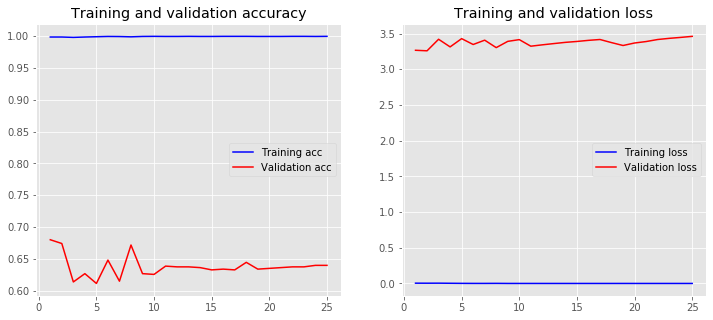

In [0]:
#test data model accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit({'sjtitle_in':train_padtext_sjt,'speaker_in':train_padtext_spk,'text_in':train_padtext_state,'subject_in':train_padtext_sub,'state_in':train_padtext_stinfo,'party_in':train_padtext_pty,'context_in':train_padtext_cnt},{'op': liar_train_y},
          epochs=25, batch_size=32,validation_data=({'sjtitle_in':test_padtext_sjt,'speaker_in':test_padtext_spk,'text_in':test_padtext_state,'subject_in':test_padtext_sub,'state_in':test_padtext_stinfo,'party_in':test_padtext_pty,'context_in':test_padtext_cnt},{'op': liar_test_y}))
plot_history(h)